# Psycholinguistic classifier

In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline  

from sklearn.ensemble import BaggingClassifier, BaggingRegressor, AdaBoostClassifier, AdaBoostRegressor
from sklearn.ensemble import ExtraTreesClassifier, ExtraTreesRegressor, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error

from xgboost import XGBClassifier, XGBRegressor

from ml_utils import print_roc, evaluate, best_threshold

from features import FeatureExtractor

from data import Data

import pandas as pd

In [3]:
psycholinguistics_path = 'utils/Psycholinguistic_Features.txt'
lm_books_path = '/Users/nathanhartmann/Desktop/cwi_utils/model_books.lm'
lm_news_path = '/Users/nathanhartmann/Desktop/cwi_utils/model_news.lm'

training_data = ['datasets/english/News_Train.tsv',
                 'datasets/english/WikiNews_Train.tsv',
                 'datasets/english/Wikipedia_Train.tsv',
                ]
dev_data = ['datasets/english/News_Dev.tsv',
            'datasets/english/WikiNews_Dev.tsv',
            'datasets/english/Wikipedia_Dev.tsv'
           ]
dev_data_news = ['datasets/english/News_Dev.tsv']
dev_data_wikinews = ['datasets/english/WikiNews_Dev.tsv']
dev_data_wikipedia = ['datasets/english/Wikipedia_Dev.tsv']
test_data = ['datasets/english/News_Test.tsv',
            'datasets/english/WikiNews_Test.tsv',
            'datasets/english/Wikipedia_Test.tsv'
           ]
test_data_news = ['datasets/english/News_Test.tsv']
test_data_wikinews = ['datasets/english/WikiNews_Test.tsv']
test_data_wikipedia = ['datasets/english/Wikipedia_Test.tsv']

-----
# Features extraction

In [4]:
data_train = Data(training_data)
data_dev = Data(dev_data)
data_test = Data(test_data, is_test=True)

# DEV
data_dev_news = Data(dev_data_news)
data_dev_wikinews = Data(dev_data_wikinews)
data_dev_wikipedia = Data(dev_data_wikipedia)

# TEST
data_test_news = Data(test_data_news, is_test=True)
data_test_wikinews = Data(test_data_wikinews, is_test=True)
data_test_wikipedia = Data(test_data_wikipedia, is_test=True)

In [5]:
fe = FeatureExtractor(psycho_path=psycholinguistics_path, lm_books_path=lm_books_path, lm_news_path=lm_news_path)

x_train = fe.predict_linguistics(data_train.instances)
y_train, y_train_prob = data_train.y, data_train.y_prob

x_dev = fe.predict_linguistics(data_dev.instances)
y_dev, y_dev_prob = data_dev.y, data_dev.y_prob

x_test = fe.predict_linguistics(data_test.instances)
y_test, y_test_prob = data_test.y, data_test.y_prob

# DEV
x_dev_news = fe.predict_linguistics(data_dev_news.instances)
y_dev_news, y_dev_news_prob = data_dev_news.y, data_dev_news.y_prob

x_dev_wikinews = fe.predict_linguistics(data_dev_wikinews.instances)
y_dev_wikinews, y_dev_wikinews_prob = data_dev_wikinews.y, data_dev_wikinews.y_prob

x_dev_wikipedia = fe.predict_linguistics(data_dev_wikipedia.instances)
y_dev_wikipedia, y_dev_wikipedia_prob = data_dev_wikipedia.y, data_dev_wikipedia.y_prob

# TEST
x_test_news = fe.predict_linguistics(data_test_news.instances)
x_test_wikinews = fe.predict_linguistics(data_test_wikinews.instances)
x_test_wikipedia = fe.predict_linguistics(data_test_wikipedia.instances)

In [6]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_dev = scaler.transform(x_dev)
x_test = scaler.transform(x_test)

# TEST
x_test_news = scaler.transform(x_test_news)
x_test_wikinews = scaler.transform(x_test_wikinews)
x_test_wikipedia = scaler.transform(x_test_wikipedia)

-----
# Classifier

## Training

--Optimizing f1--


/Users/nathanhartmann/Desktop/cwi-workshop/env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Threshold: 0.45
--Scores--
Accuracy: 0.75
Precision: 0.69
Recall: 0.71
F1: 0.70
--Confusion matrix:--
 [[1558  434]
 [ 382  954]]


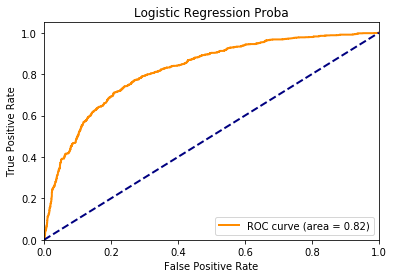

In [7]:
model = LogisticRegression()
model.fit(x_train, y_train)
pred_train= model.predict_proba(x_train)[:, 1:]
pred_dev = model.predict_proba(x_dev)[:, 1:]
evaluate(pred_train, pred_dev, y_train, y_dev, optimize='f1', label='Logistic Regression Proba')

/Users/nathanhartmann/Desktop/cwi-workshop/env/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)
/Users/nathanhartmann/Desktop/cwi-workshop/env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


--Optimizing f1--
Threshold: 0.45
--Scores--
Accuracy: 0.75
Precision: 0.68
Recall: 0.70
F1: 0.69
--Confusion matrix:--
 [[1533  440]
 [ 407  948]]


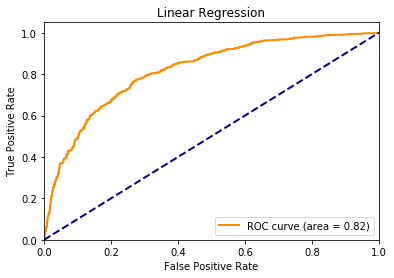

In [8]:
model = LinearRegression()
model.fit(x_train, y_train)
pred_train= model.predict(x_train)
pred_dev = model.predict(x_dev)
evaluate(pred_train, pred_dev, y_train, y_dev, optimize='f1', label='Linear Regression')

--Optimizing f1--


/Users/nathanhartmann/Desktop/cwi-workshop/env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Threshold: 0.47
--Scores--
Accuracy: 0.82
Precision: 0.80
Recall: 0.78
F1: 0.79
--Confusion matrix:--
 [[1620  281]
 [ 320 1107]]


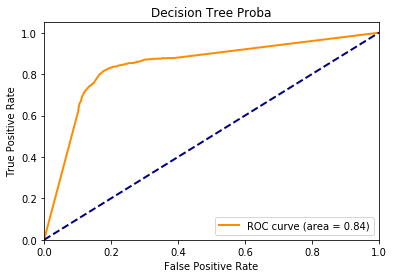

In [9]:
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred_train= model.predict_proba(x_train)[:, 1:]
pred_dev = model.predict_proba(x_dev)[:, 1:]
evaluate(pred_train, pred_dev, y_train, y_dev, optimize='f1', label='Decision Tree Proba')

--Optimizing f1--
Threshold: 0.50
--Scores--
Accuracy: 0.80
Precision: 0.72
Recall: 0.77
F1: 0.75
--Confusion matrix:--
 [[1649  386]
 [ 291 1002]]


/Users/nathanhartmann/Desktop/cwi-workshop/env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


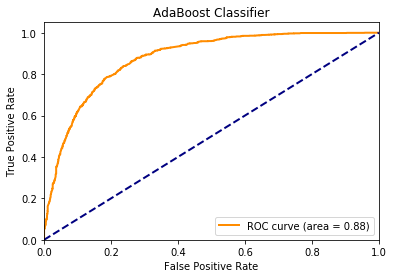

In [10]:
model = AdaBoostClassifier()
model.fit(x_train, y_train)
pred_train= model.predict_proba(x_train)[:, 1:]
pred_dev = model.predict_proba(x_dev)[:, 1:]
evaluate(pred_train, pred_dev, y_train, y_dev, optimize='f1', label='AdaBoost Classifier')

--Optimizing f1--


/Users/nathanhartmann/Desktop/cwi-workshop/env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Threshold: 0.51
--Scores--
Accuracy: 0.84
Precision: 0.80
Recall: 0.80
F1: 0.80
--Confusion matrix:--
 [[1668  276]
 [ 272 1112]]


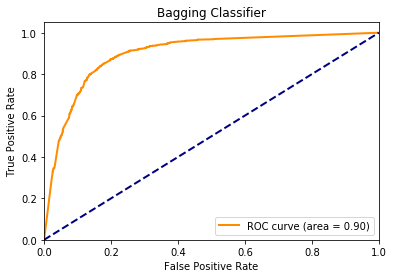

In [11]:
model = BaggingClassifier()
model.fit(x_train, y_train)
pred_train= model.predict_proba(x_train)[:, 1:]
pred_dev = model.predict_proba(x_dev)[:, 1:]
evaluate(pred_train, pred_dev, y_train, y_dev, optimize='f1', label='Bagging Classifier')

--Optimizing f1--


/Users/nathanhartmann/Desktop/cwi-workshop/env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Threshold: 0.51
--Scores--
Accuracy: 0.83
Precision: 0.80
Recall: 0.79
F1: 0.80
--Confusion matrix:--
 [[1652  274]
 [ 288 1114]]


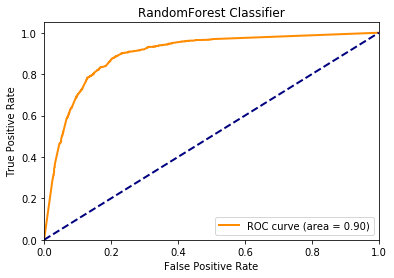

In [12]:
model = RandomForestClassifier()
model.fit(x_train, y_train)
pred_train= model.predict_proba(x_train)[:, 1:]
pred_dev = model.predict_proba(x_dev)[:, 1:]
evaluate(pred_train, pred_dev, y_train, y_dev, optimize='f1', label='RandomForest Classifier')

--Optimizing f1--


/Users/nathanhartmann/Desktop/cwi-workshop/env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Threshold: 0.47
--Scores--
Accuracy: 0.83
Precision: 0.82
Recall: 0.79
F1: 0.80
--Confusion matrix:--
 [[1634  247]
 [ 306 1141]]


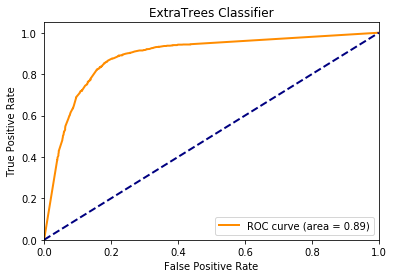

In [13]:
model = ExtraTreesClassifier()
model.fit(x_train, y_train)
pred_train= model.predict_proba(x_train)[:, 1:]
pred_dev = model.predict_proba(x_dev)[:, 1:]
evaluate(pred_train, pred_dev, y_train, y_dev, optimize='f1', label='ExtraTrees Classifier')

--Optimizing f1--


/Users/nathanhartmann/Desktop/cwi-workshop/env/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


Threshold: 0.51
--Scores--
Accuracy: 0.84
Precision: 0.82
Recall: 0.79
F1: 0.81
--Confusion matrix:--
 [[1646  249]
 [ 294 1139]]


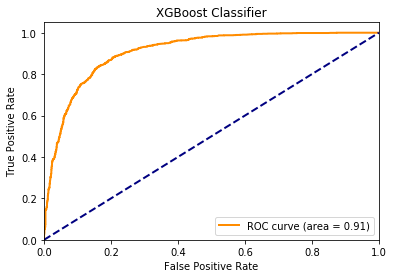

In [14]:
model = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1)
model.fit(x_train, y_train)
pred_train= model.predict_proba(x_train)[:, 1:]
pred_dev = model.predict_proba(x_dev)[:, 1:]
evaluate(pred_train, pred_dev, y_train, y_dev, optimize='f1', label='XGBoost Classifier')

-----
# Regressor

## Training

In [15]:
model = XGBRegressor()
model.fit(x_train, y_train)
pred_train= model.predict(x_train)
pred_dev = model.predict(x_dev)

In [16]:
print('mean_absolute_error(pred_train, y_train):', mean_absolute_error(pred_train, y_train))
print('mean_absolute_error(pred_train, y_train_prob):', mean_absolute_error(pred_train, y_train_prob))
print('mean_absolute_error(pred_dev, y_dev):', mean_absolute_error(pred_dev, y_dev))
print('mean_absolute_error(pred_dev, y_dev_prob):', mean_absolute_error(pred_dev, y_dev_prob))

mean_absolute_error(pred_train, y_train): 0.27535599561077173
mean_absolute_error(pred_train, y_train_prob): 0.33090058123590727
mean_absolute_error(pred_dev, y_dev): 0.27989509725011885
mean_absolute_error(pred_dev, y_dev_prob): 0.329550652549817
